<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install numpy

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 181.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 140.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 136.3 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-08 10:54:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.5MB/s    in 2.8s    

2025-07-08 10:54:33 (54.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


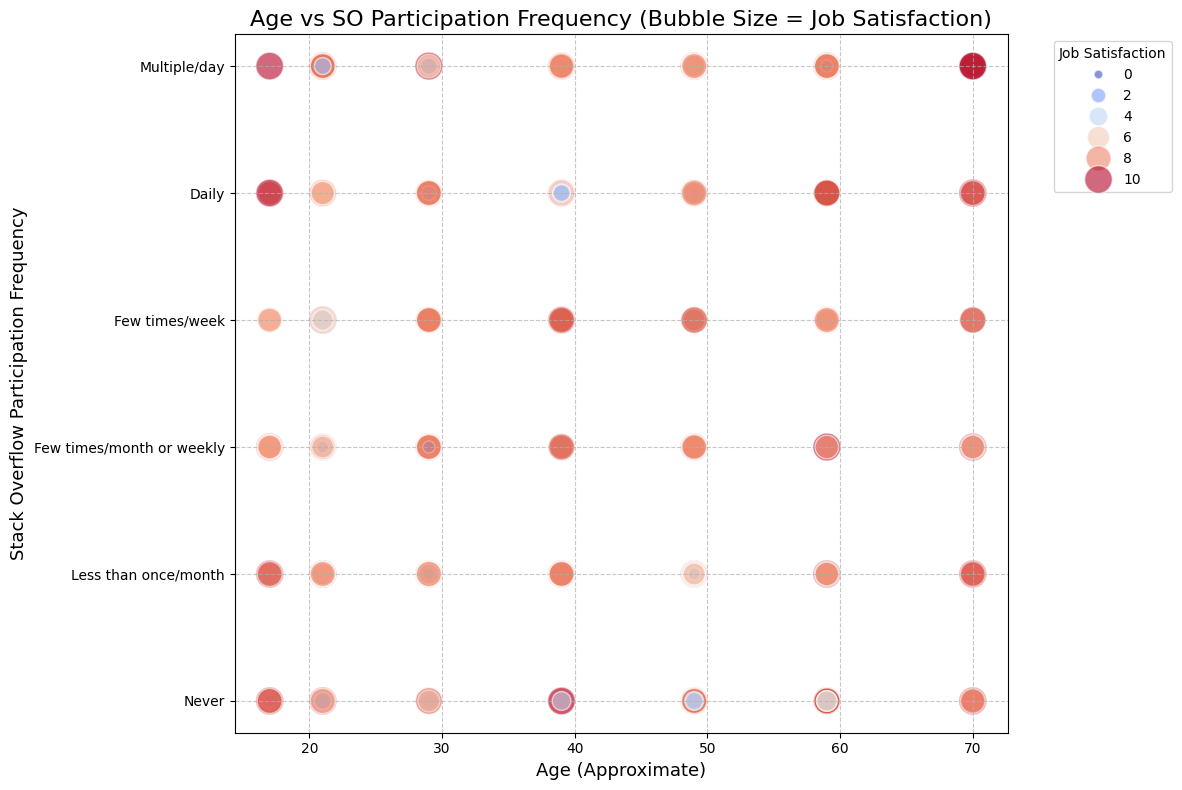

In [3]:
# Example mapping for Age groups
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
so_part_freq_mapping = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# Apply mappings
df['AgeNum'] = df['Age'].map(age_mapping)
df['SOPartFreqNum'] = df['SOPartFreq'].map(so_part_freq_mapping)

# Drop rows with missing values
df_filtered = df.dropna(subset=['AgeNum', 'SOPartFreqNum', 'JobSat'])

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtered,
    x='AgeNum',
    y='SOPartFreqNum',
    size='JobSat',
    sizes=(40, 400),
    hue='JobSat',
    palette='coolwarm',
    alpha=0.6
)

plt.title('Age vs SO Participation Frequency (Bubble Size = Job Satisfaction)', fontsize=16)
plt.xlabel('Age (Approximate)', fontsize=13)
plt.ylabel('Stack Overflow Participation Frequency', fontsize=13)
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        'Never', 'Less than once/month', 'Few times/month or weekly',
        'Few times/week', 'Daily', 'Multiple/day'
    ]
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


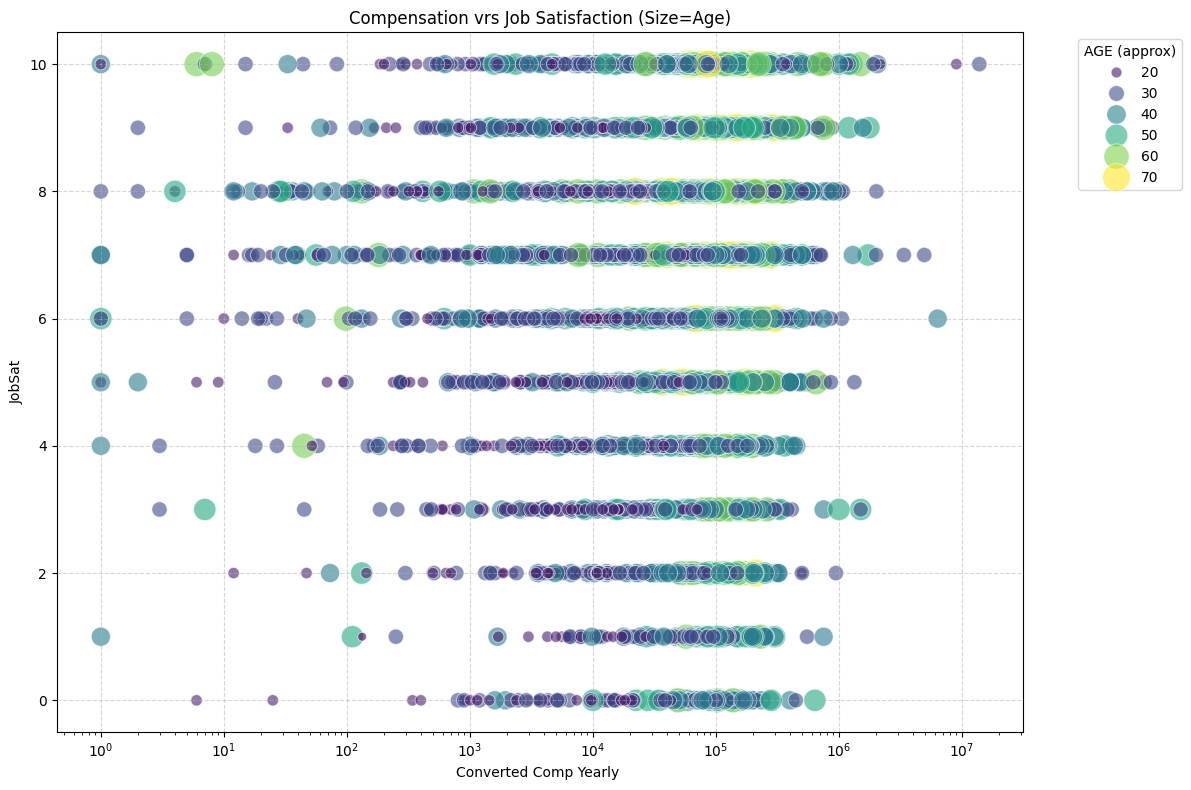

In [13]:
#drop rows with Missing value
df_filtered=df.dropna(subset=['ConvertedCompYearly','JobSat','AgeNum'])

#Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
        data=df_filtered,
        x='ConvertedCompYearly',
        y='JobSat',
        size='AgeNum',
        sizes=(40, 400),
        hue='AgeNum',
        palette='viridis',
        alpha=0.6
)


plt.title('Compensation vrs Job Satisfaction (Size=Age)')
plt.xlabel('Converted Comp Yearly ')
plt.xscale('log')
plt.ylabel('JobSat')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='AGE (approx)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



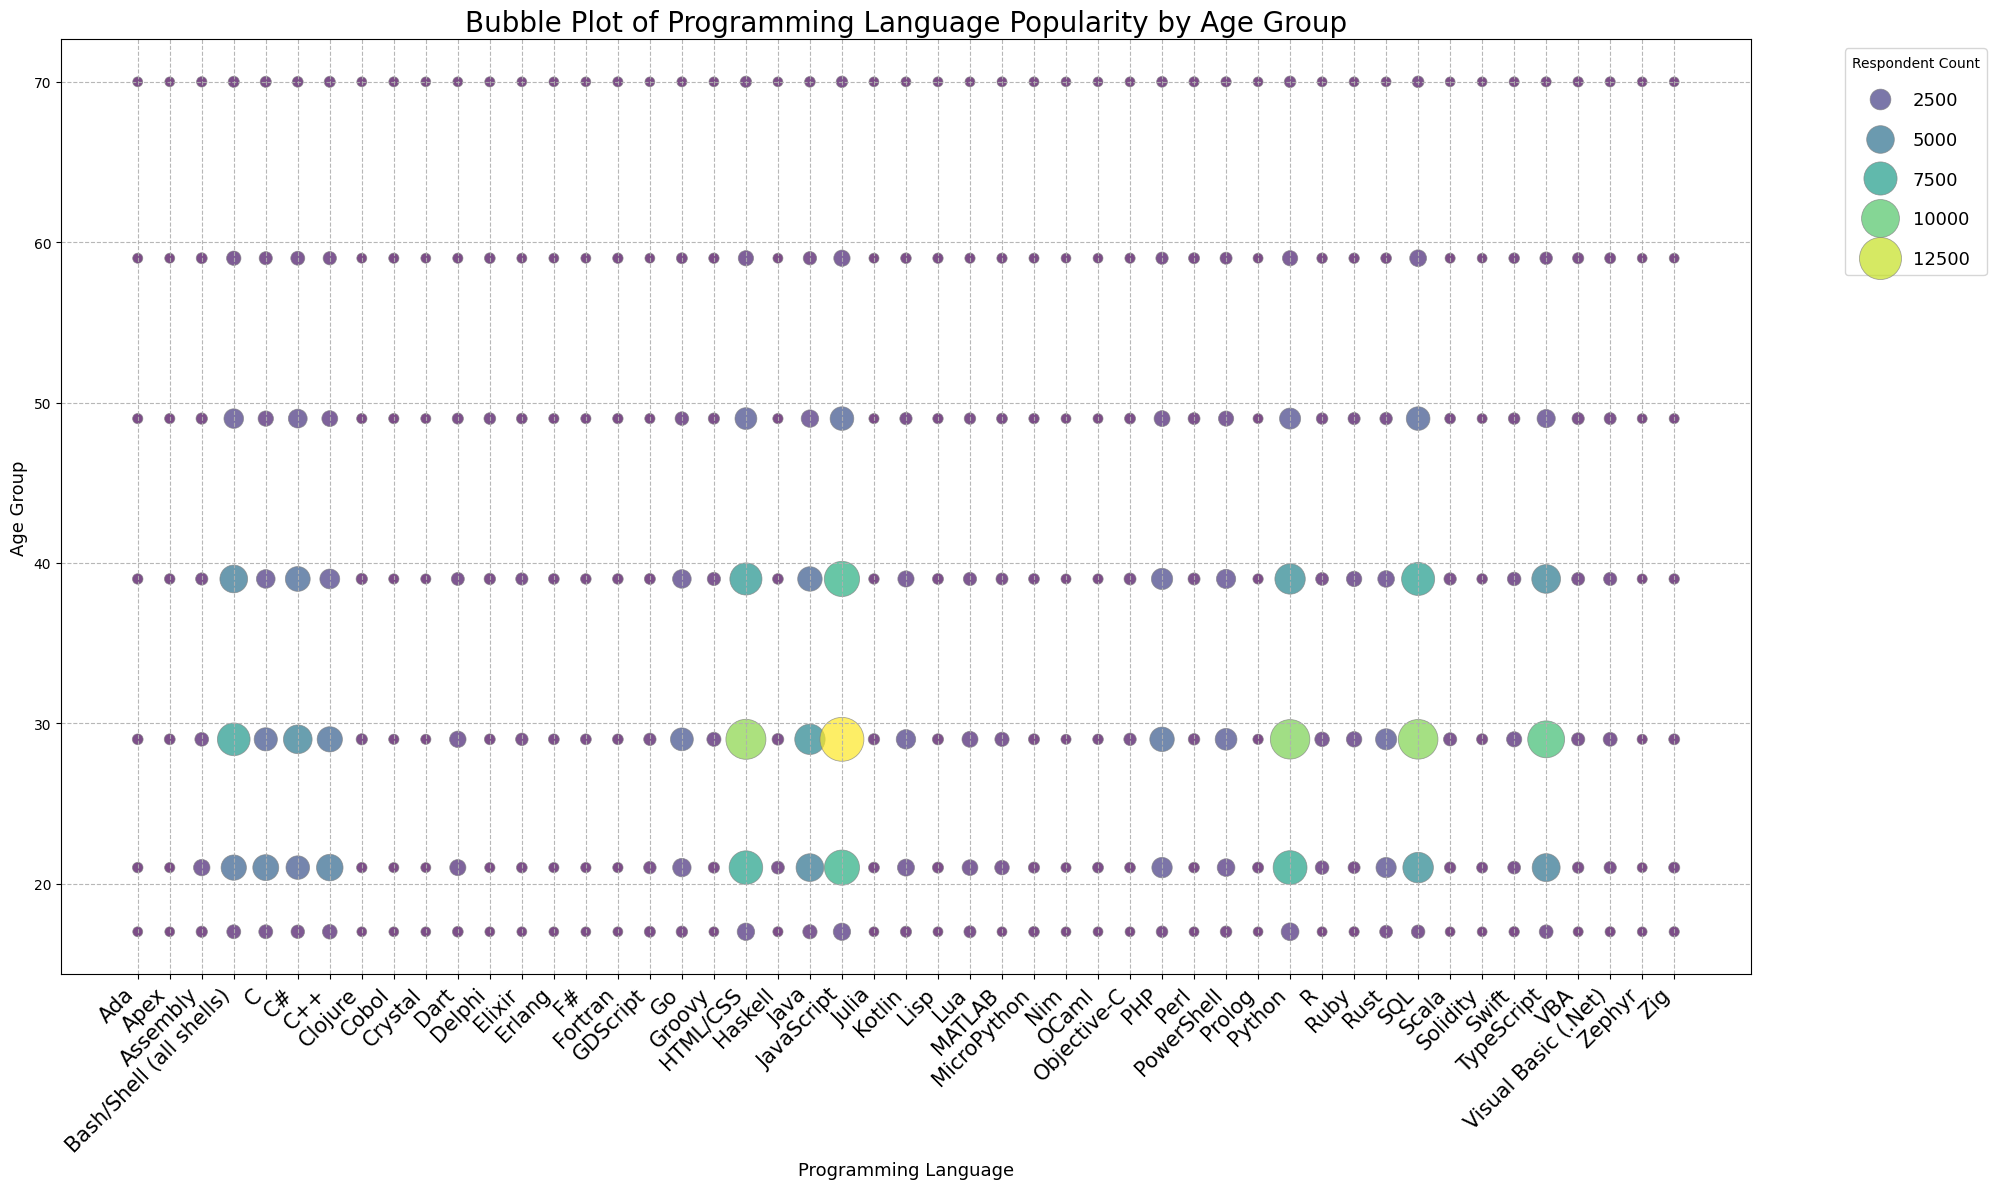

In [31]:
df_filtered = df.dropna(subset=['LanguageHaveWorkedWith', 'AgeNum'])

df_exploded=df_filtered.assign(
    Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

df_exploded['Language'] = df_exploded['Language'].str.strip()

lang_age_counts = df_exploded.groupby(['Language', 'AgeNum']).size().reset_index(name='Count')

# --- Step 4: Bubble plot ---
plt.figure(figsize=(20, 12))
sns.scatterplot(
    data=lang_age_counts,
    x='Language',
    y='AgeNum',
    size='Count',
    sizes=(50, 1000),
    hue='Count',
    palette='viridis',
    alpha=0.7,
    edgecolor='gray'
)

# Format plot
plt.title('Bubble Plot of Programming Language Popularity by Age Group', fontsize=20)
plt.xlabel('Programming Language', fontsize=13)
plt.ylabel('Age Group', fontsize=13)
plt.xticks(rotation=45, ha='right',fontsize=15)
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, labelspacing=1.2, )
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


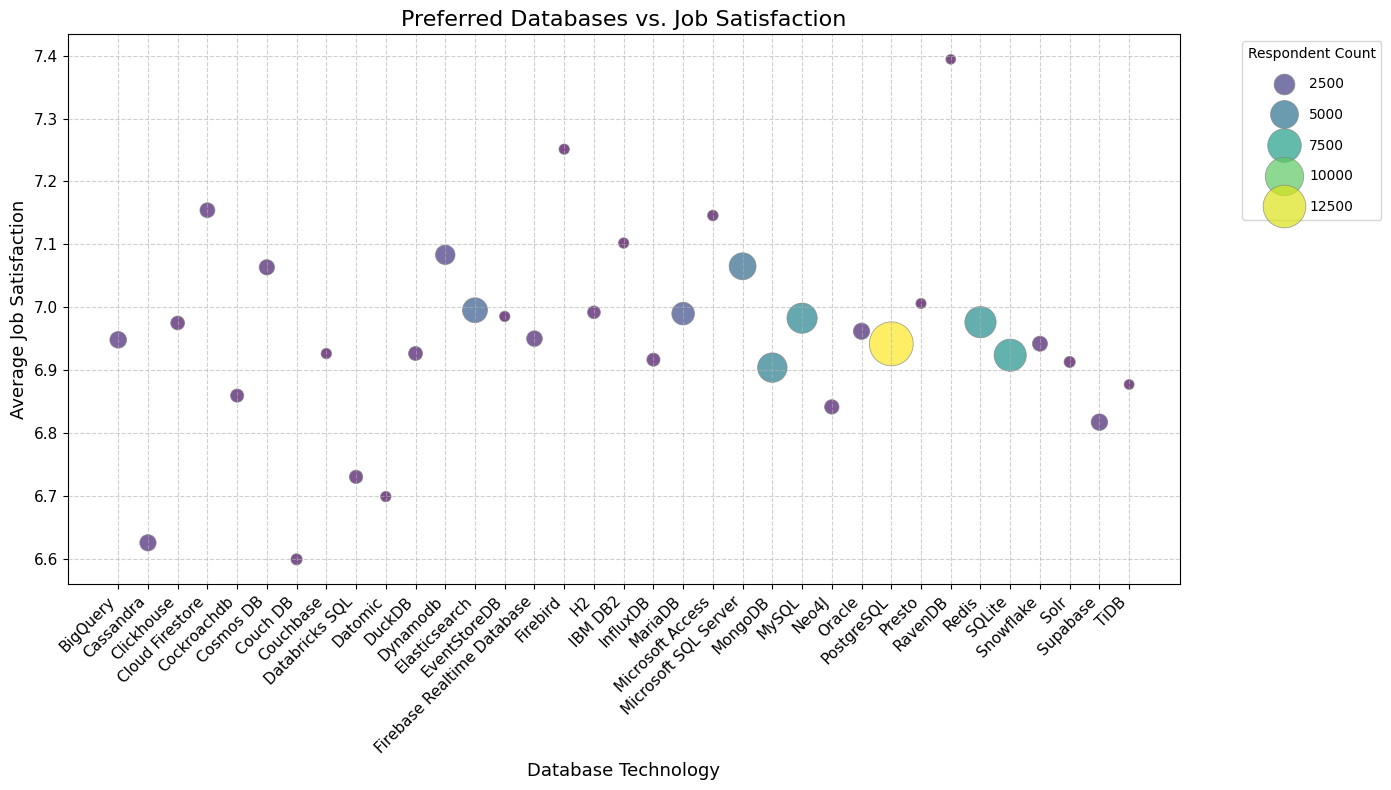

In [33]:
# Step 1: Drop missing values
df_filtered = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Step 2: Explode the multi-select field
df_exploded = df_filtered.assign(
    Database=df_filtered['DatabaseWantToWorkWith'].str.split(';')
).explode('Database')

# Step 3: Clean whitespace
df_exploded['Database'] = df_exploded['Database'].str.strip()

# Step 4: Group by database → calculate average JobSat and count
db_stats = (
    df_exploded.groupby('Database')
    .agg(AverageJobSat=('JobSat', 'mean'), RespondentCount=('JobSat', 'size'))
    .reset_index()
)

# Step 5: Bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=db_stats,
    x='Database',
    y='AverageJobSat',
    size='RespondentCount',
    sizes=(50, 1000),
    hue='RespondentCount',
    palette='viridis',
    alpha=0.7,
    edgecolor='gray'
)

# Customize plot
plt.title('Preferred Databases vs. Job Satisfaction', fontsize=16)
plt.xlabel('Database Technology', fontsize=13)
plt.ylabel('Average Job Satisfaction', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left', labelspacing=1.2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


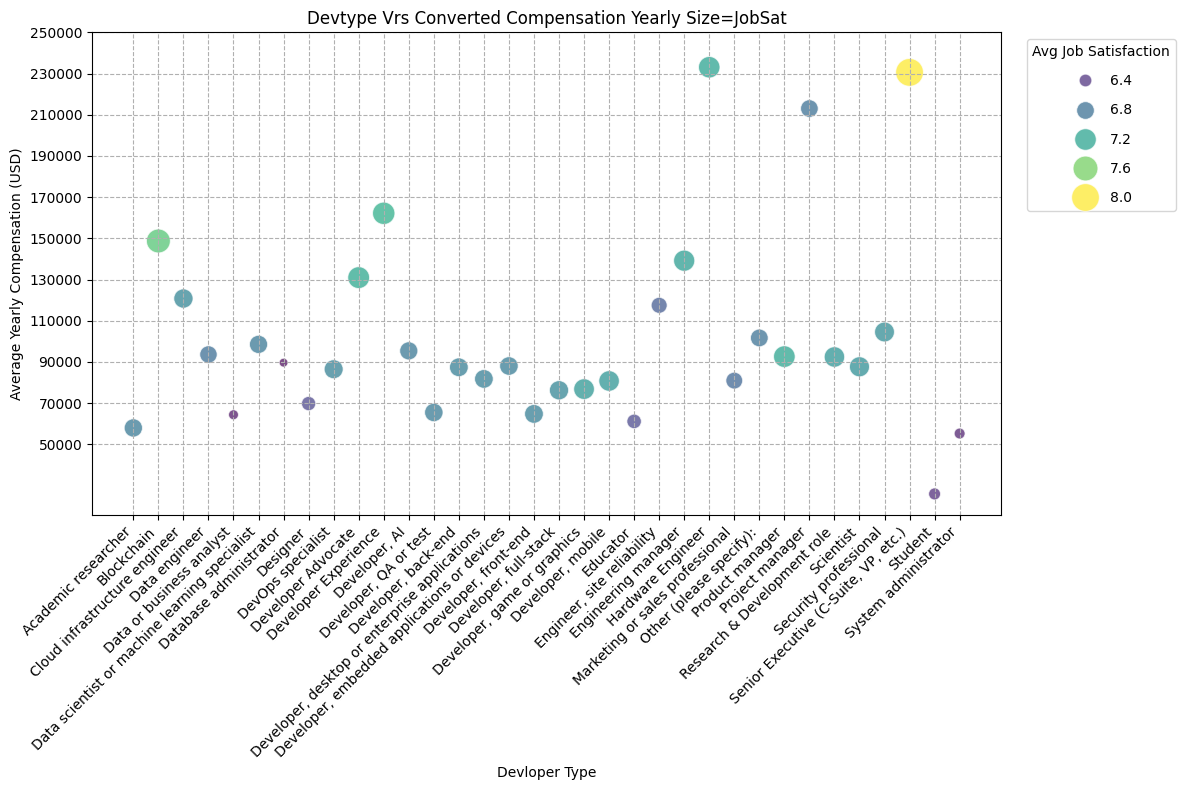

In [52]:
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

df_grouped = ( df.groupby('DevType')
              .agg(AverageComp=('ConvertedCompYearly', 'mean'), AverageJobSat=('JobSat', 'mean'))
              .reset_index()
             )

#plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_grouped,
    x='DevType',
    y='AverageComp',
    size='AverageJobSat',
    sizes=(40, 400),
    hue='AverageJobSat',
    palette='viridis',
    alpha=0.7
)

plt.title('Devtype Vrs Converted Compensation Yearly Size=JobSat')
plt.xlabel('Devloper Type')
plt.ylabel('Average Yearly Compensation (USD)')
plt.yticks(range(50000,250001,20000))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')
plt.legend(title='Avg Job Satisfaction', bbox_to_anchor=(1.2, 1), labelspacing=1.1, loc='upper right')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


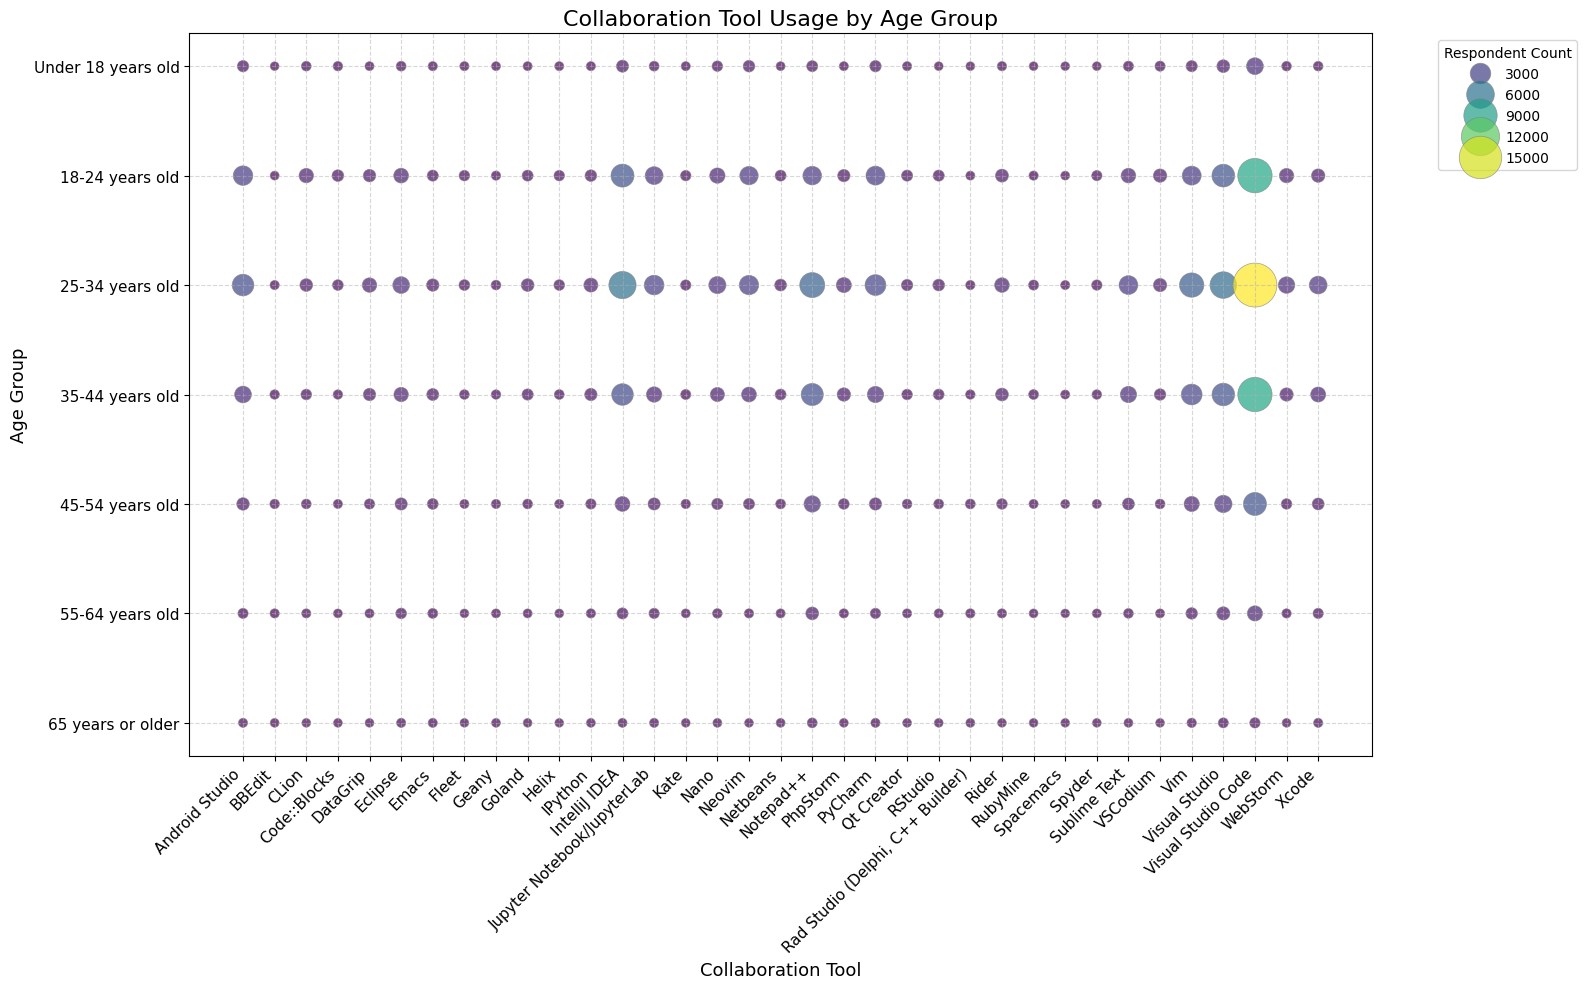

In [55]:
# Step 1: Drop missing values
df_filtered = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Step 2: Explode semicolon-separated collaboration tools
df_exploded = df_filtered.assign(
    Tool=df_filtered['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Step 3: Clean whitespace
df_exploded['Tool'] = df_exploded['Tool'].str.strip()

# Optional: Order Age categories if applicable
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_exploded = df_exploded[df_exploded['Age'].isin(age_order)]
df_exploded['Age'] = pd.Categorical(df_exploded['Age'], categories=age_order, ordered=True)

# Step 4: Count tool usage by age group
tool_age_counts = (
    df_exploded.groupby(['Tool', 'Age'], observed = True)
    .size()
    .reset_index(name='Count')
)

# Step 5: Bubble plot
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=tool_age_counts,
    x='Tool',
    y='Age',
    size='Count',
    sizes=(40, 1000),
    hue='Count',
    palette='viridis',
    alpha=0.7,
    edgecolor='gray'
)

# Customize plot
plt.title('Collaboration Tool Usage by Age Group', fontsize=16)
plt.xlabel('Collaboration Tool', fontsize=13)
plt.ylabel('Age Group', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



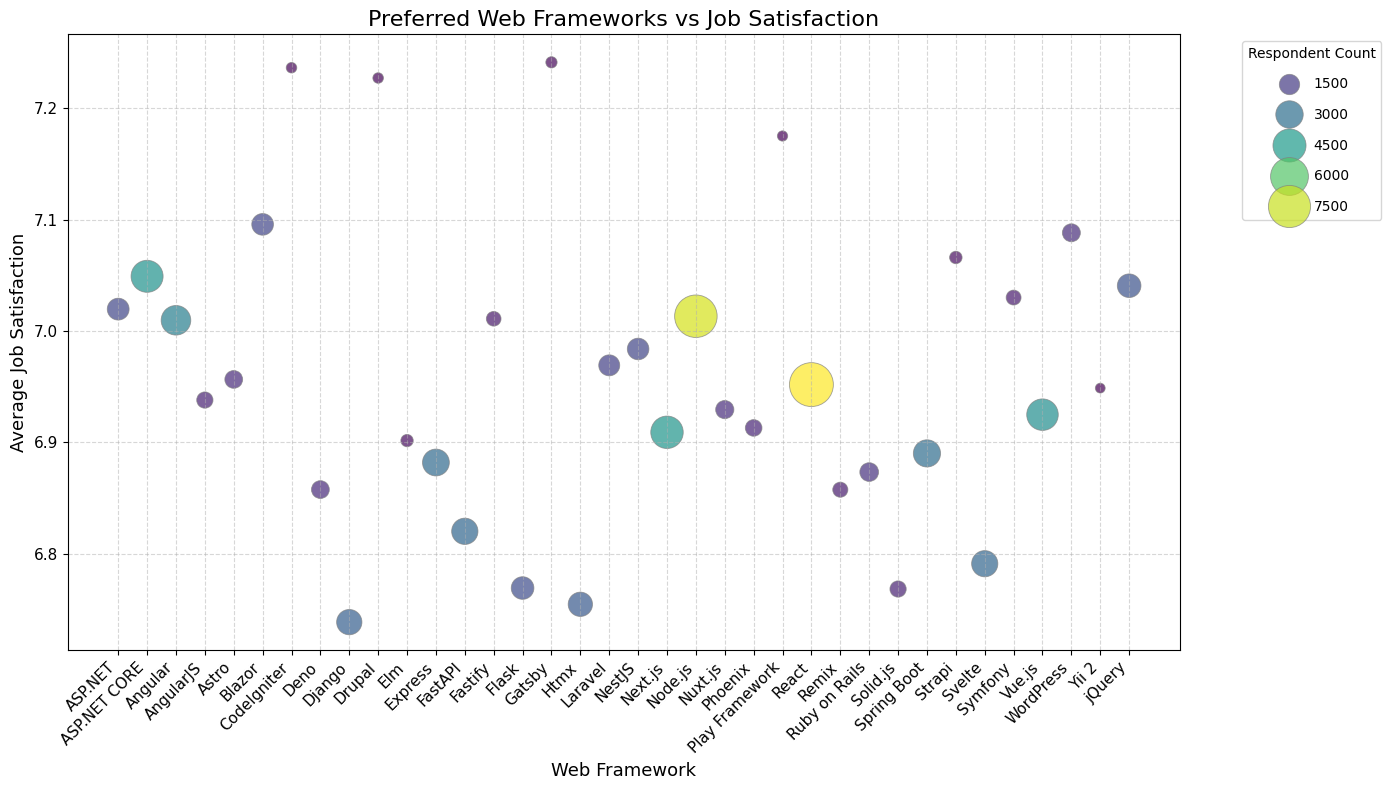

In [58]:
# Step 1: Drop rows with missing values
df_filtered = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Step 2: Explode the multi-select framework column
df_exploded = df_filtered.assign(
    Framework=df_filtered['WebframeWantToWorkWith'].str.split(';')
).explode('Framework')

# Step 3: Strip whitespace
df_exploded['Framework'] = df_exploded['Framework'].str.strip()

# Step 4: Group by framework to get average job satisfaction and count
framework_stats = (
    df_exploded.groupby('Framework')
    .agg(AverageJobSat=('JobSat', 'mean'), RespondentCount=('JobSat', 'size'))
    .reset_index()
)

# Optional: Filter out frameworks with very few responses
framework_stats = framework_stats[framework_stats['RespondentCount'] > 30]

# Step 5: Create the bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=framework_stats,
    x='Framework',
    y='AverageJobSat',
    size='RespondentCount',
    sizes=(50, 1000),
    hue='RespondentCount',
    palette='viridis',
    alpha=0.7,
    edgecolor='gray'
)

# Plot formatting
plt.title('Preferred Web Frameworks vs Job Satisfaction', fontsize=16)
plt.xlabel('Web Framework', fontsize=13)
plt.ylabel('Average Job Satisfaction', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left', labelspacing=(1.2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



/tmp/ipykernel_301/3448592152.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Country'] = df_top['Country'].replace({


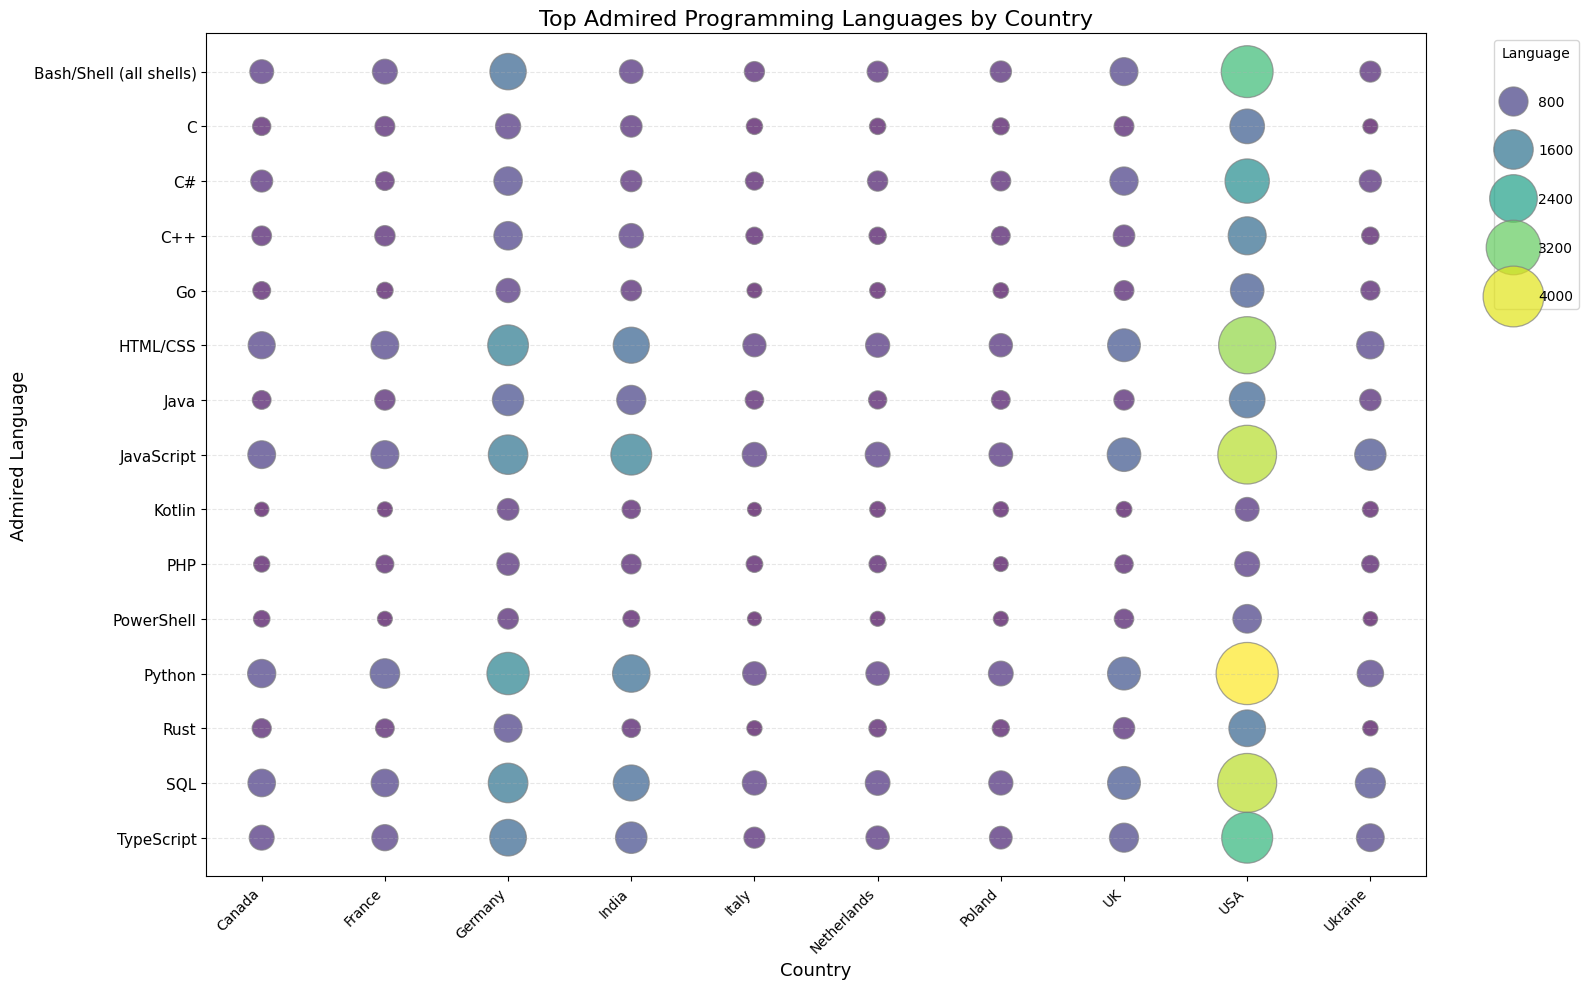

In [73]:
# Preprocessing 
df_filtered = df.dropna(subset=['LanguageAdmired', 'Country'])

# Explode semicolon-separated languages
df_exploded = df_filtered.assign(
    Language=df_filtered['LanguageAdmired'].str.split(';')
).explode('Language')
df_exploded['Language'] = df_exploded['Language'].str.strip()

# Top Languages Only (limit to top 15 globally)
top_langs = df_exploded['Language'].value_counts().nlargest(15).index
df_top = df_exploded[df_exploded['Language'].isin(top_langs)]

#Abbreviate country names
df_top['Country'] = df_top['Country'].replace({
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia',
    'Iran, Islamic Republic of...': 'Iran',
    'Viet Nam': 'Vietnam'
})

# Count admiration frequency ---
lang_country_counts = (
    df_top.groupby(['Country', 'Language'], observed=True)
    .size()
    .reset_index(name='Count')
)

#Limit to top 10 countries for clarity
top_countries = df_top['Country'].value_counts().nlargest(10).index
lang_country_counts = lang_country_counts[lang_country_counts['Country'].isin(top_countries)]


# Plot (Seaborn Bubble Plot) ---
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=lang_country_counts,
    x='Country',
    y='Language',
    hue='Count',  
    size='Count',
    sizes=(100, 2000),
    alpha=0.7,
    palette='viridis',
    edgecolor='gray'
)

#Aesthetics
plt.title('Top Admired Programming Languages by Country', fontsize=16)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Admired Language', fontsize=13)
plt.yticks(fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', axis='y', alpha=0.3)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left',labelspacing=2.5)
plt.tight_layout()
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
